In [2]:
import pandas as pd
import numpy as np

import plotly.plotly as py
import plotly.graph_objs as go

from scipy import optimize as opt 
import scipy
import scipy.odr as odr

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [32]:
dataA = pd.read_csv('data/experimentA.csv') # Считываем данные
dataB = pd.read_csv('data/experimentB.csv') 
dataC = pd.read_csv('data/experimentC.csv') 

## A part

In [19]:
dataA.insert(2, '1/tau', 10**6 * np.reciprocal(dataA['tau'].astype(float)))
dataA['nu'] = 10**3 * dataA['nu'].astype(float)
dataA['tau'] = dataA['tau'].astype(float)

In [22]:
dataA

,tau,nu,1/tau,err_nu,err_1/tau
0,25.0,40000.0,40000.000000,1500.0,1600.000000
1,50.0,17500.0,20000.000000,1500.0,400.000000
2,75.0,12500.0,13333.333333,1500.0,177.777778
3,100.0,9000.0,10000.000000,1500.0,100.000000
4,120.0,7000.0,8333.333333,1500.0,69.444444
5,150.0,6000.0,6666.666667,600.0,44.444444
6,175.0,5000.0,5714.285714,600.0,32.653061
7,200.0,4000.0,5000.000000,600.0,25.000000


In [21]:
dataA.insert(3, 'err_nu', [1.5, 1.5, 1.5, 1.5, 1.5, 0.6, 0.6, 0.6])
dataA['err_nu'] = 10**3 * dataA['err_nu'] 
dataA.insert(4, 'err_1/tau', 1*np.reciprocal(dataA['tau'])*dataA['1/tau'])

In [23]:
Y = np.reshape(np.array(dataA['nu']), (1, len(np.array(dataA['nu']))))
X = np.reshape(np.array(dataA['1/tau']), (1, len(np.array(dataA['1/tau']))))
def f(x, b, c):
    return b*x+c
parameters_opt_1, parameters_cov_1 = opt.curve_fit(f, X[0], Y[0])
print (parameters_opt_1)
print (np.sqrt(np.diag(parameters_cov_1)))

[  1.01448588e+00  -1.20340877e+03]
[  2.41850770e-02   4.23180092e+02]


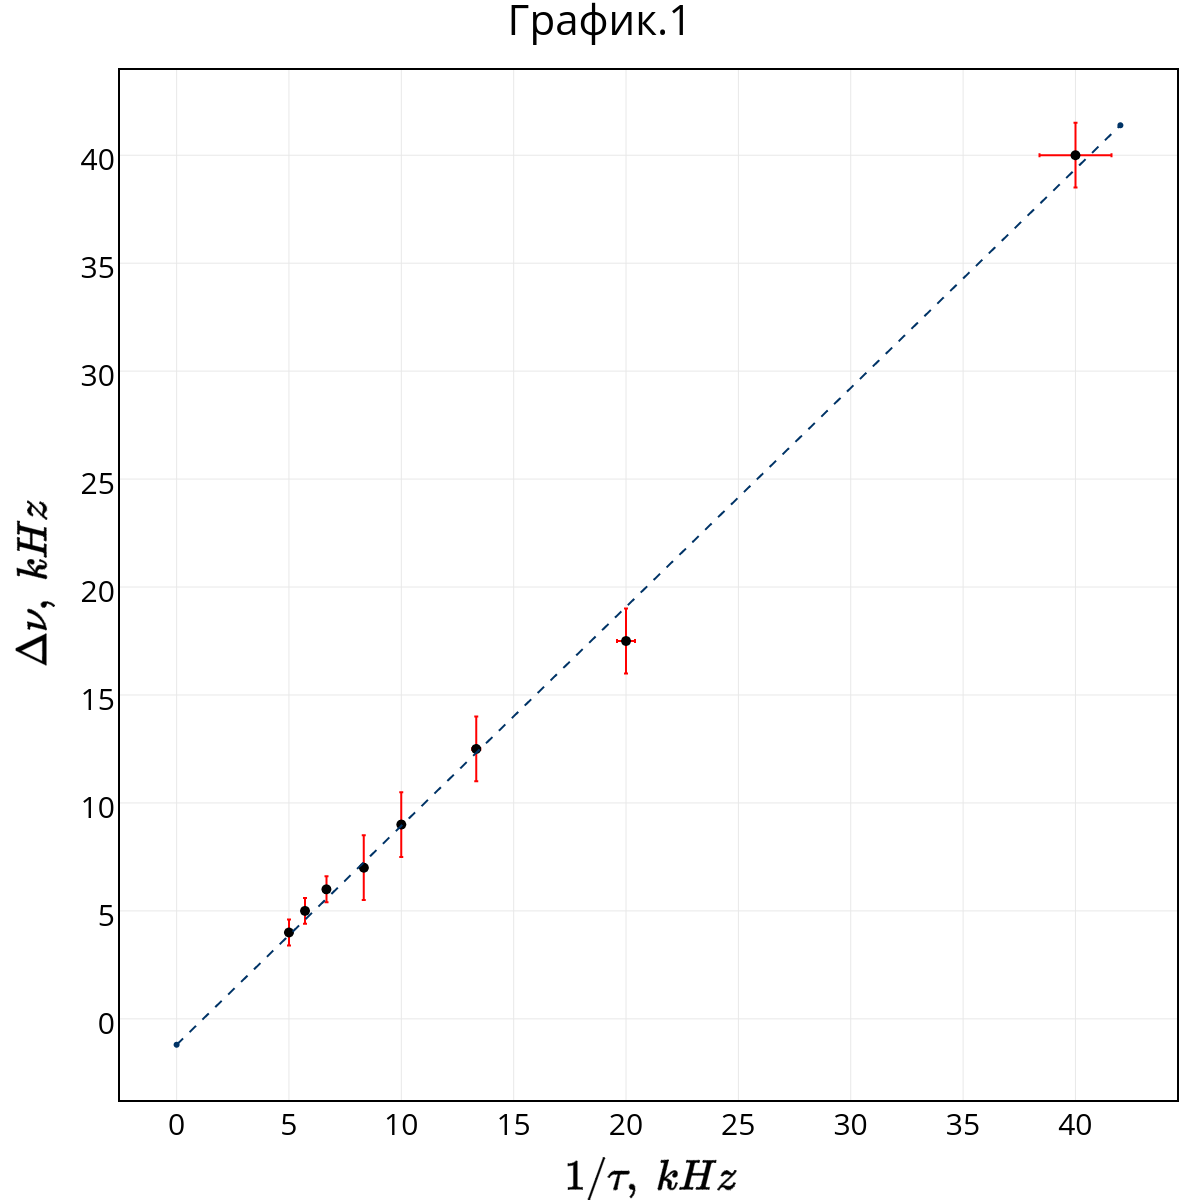

In [28]:
trace1 = go.Scatter(
    y = dataA['nu']/1000,
    x = dataA['1/tau']/1000,
    mode = 'markers',
    name = '$I~=~0,3~mA$',
    error_y = dict(
        type = 'data',
        array = dataA['err_nu']/1000,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    error_x = dict(
        type = 'data',
        array = dataA['err_1/tau']/1000,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#000000'
    ),
)

trace1a = go.Scatter(
    x = [0.0, 42],
    y = [-1.2, -1.2 + 1014*42/1000],
    line = dict(
        color = ('#003366'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace0 = [trace1, trace1a]

layout = go.Layout(
    showlegend=False,
    title = "График.1",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$1/{τ},~kHz$',
        #range = [0.0, 42.0],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$\Delta{ν},~kHz$',
        #range = [0, 42],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 120,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    ),
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(fig, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot1.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot1.png", width=500)

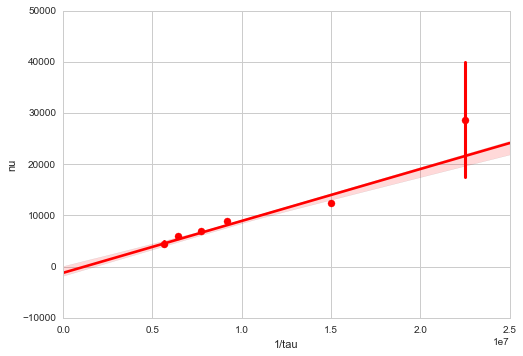

In [26]:
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.regplot(x=dataA['1/tau']*1000, y=dataA['nu'], x_bins=7, color='red')

## B part

In [36]:
dataB

,f,nu,err_nu,err_f
0,1000.0,1000.0,100.0,100.0
1,2000.0,2000.0,100.0,100.0
2,3000.0,3000.0,100.0,100.0
3,4000.0,4100.0,200.0,100.0
4,5000.0,5000.0,200.0,100.0
5,6000.0,6000.0,200.0,100.0
6,7000.0,7000.0,200.0,100.0
7,8000.0,8000.0,400.0,100.0


In [34]:
dataB['nu'] = 10**3 * dataB['nu'].astype(float)
dataB['f'] = 10**3 * dataB['f'].astype(float)

In [35]:
dataB.insert(2, 'err_nu', [0.1, 0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.4])
dataB['err_nu'] = 10**3 * dataB['err_nu']
dataB.insert(3, 'err_f', 0.1 * 10**3)

In [44]:
Y = np.reshape(np.array(dataB['nu']), (1, len(np.array(dataB['nu']))))
X = np.reshape(np.array(dataB['f']), (1, len(np.array(dataB['f']))))
def f(x, b, c):
    return b*x+c
parameters_opt_1, parameters_cov_1 = opt.curve_fit(f, X[0], Y[0])
print (parameters_opt_1)
print (np.sqrt(np.diag(parameters_cov_1)))

[  0.99880952  17.85714286]
[  5.87248954e-03   2.96545891e+01]


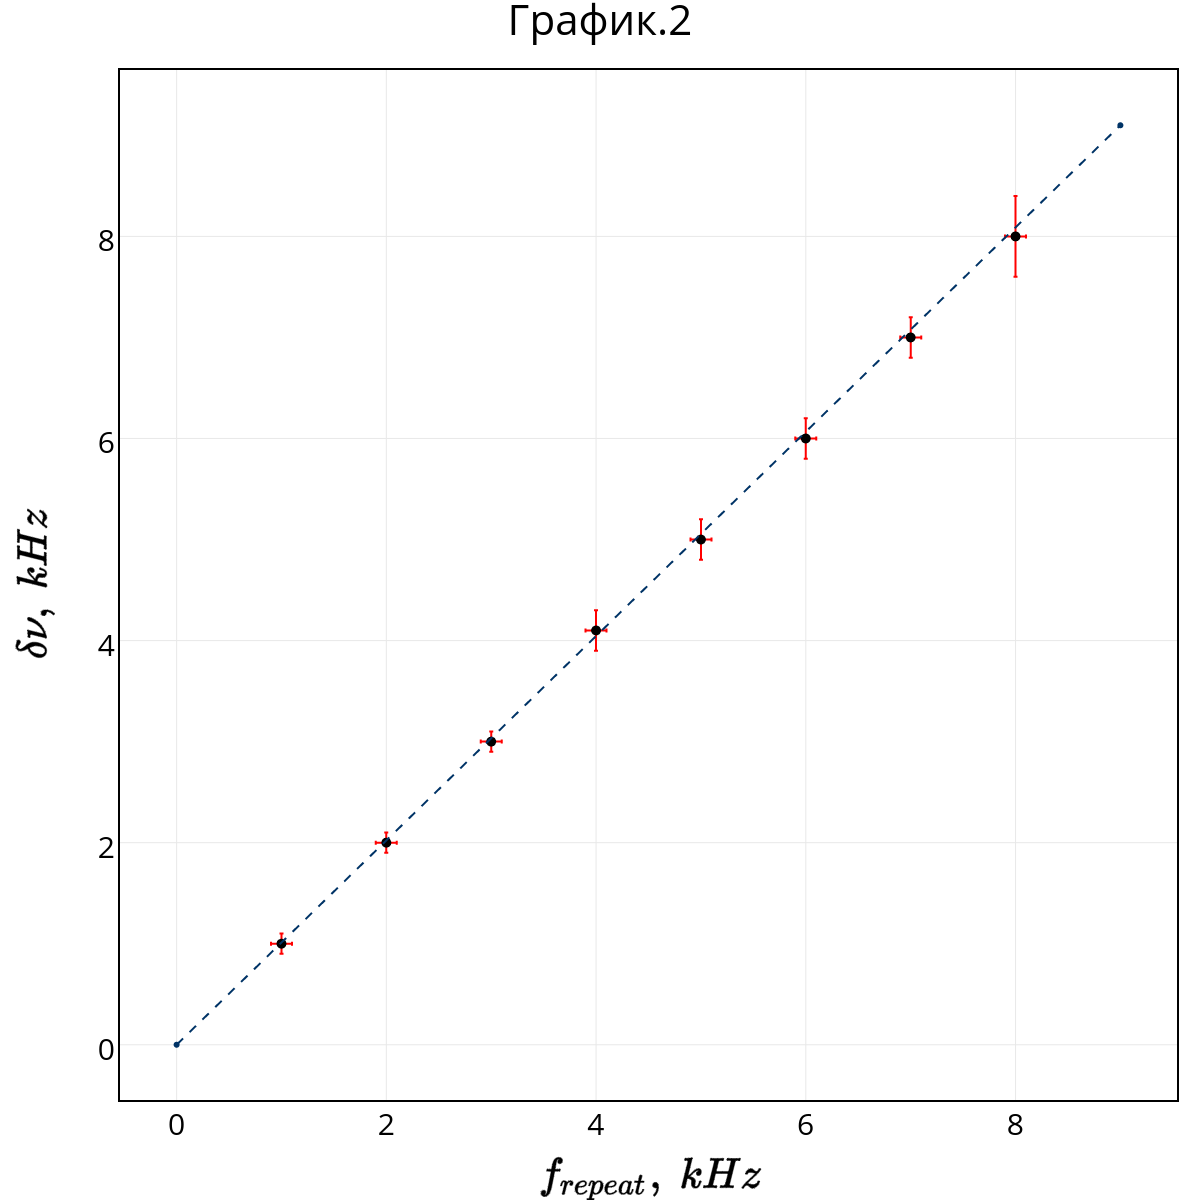

In [43]:
trace1 = go.Scatter(
    y = dataB['nu']/1000,
    x = dataB['f']/1000,
    mode = 'markers',
    name = '$I~=~0,3~mA$',
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#000000'
    ),
    error_y = dict(
        type = 'data',
        array = dataB['err_nu']/1000,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    error_x = dict(
        type = 'data',
        array = dataB['err_f']/1000,
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    )
)

trace1a = go.Scatter(
    x = [0.0, 9.0],
    y = [0, 9.1],
    line = dict(
        color = ('#003366'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace0 = [trace1, trace1a]

layout = go.Layout(
    showlegend=False,
    title = "График.2",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$f_{repeat},~kHz$',
        #range = [0.0, 9.0],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$\delta{ν},~kHz$',
        #range = [0, 9],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 120,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    ),
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(fig, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot2.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot2.png", width=500)

## C part

In [48]:
dataC

,m,Abok,Aosn,A
0,1.00,4.0,8.0,0.5000
1,0.60,2.5,8.0,0.3125
2,0.80,3.8,8.0,0.4750
3,0.15,0.6,8.0,0.0750
4,0.20,1.0,8.0,0.1250
5,0.50,2.0,8.0,0.2500
6,0.10,0.2,8.0,0.0250


In [46]:
dataC['m'] = dataC['m'].astype(float)
dataC['Abok'] = dataC['Abok'].astype(float)
dataC['Aosn'] = dataC['Aosn'].astype(float)

In [47]:
dataC.insert(3, 'A', dataC['Abok']/dataC['Aosn'])

In [49]:
dataC.insert(4, 'err_m', 0.02)
dataC.insert(5, 'err_A', dataC['A']*(0.2*np.reciprocal(dataC['Abok']) + 0.2*np.reciprocal(dataC['Aosn'])))

In [50]:
Y = np.reshape(np.array(dataC['A']), (1, len(np.array(dataC['A']))))
X = np.reshape(np.array(dataC['m']), (1, len(np.array(dataC['m']))))
def f(x, b, c):
    return b*x+c
parameters_opt_1, parameters_cov_1 = opt.curve_fit(f, X[0], Y[0])
print (parameters_opt_1)
print (np.sqrt(np.diag(parameters_cov_1)))

[ 0.53910129 -0.00621276]
[ 0.03667643  0.02112594]


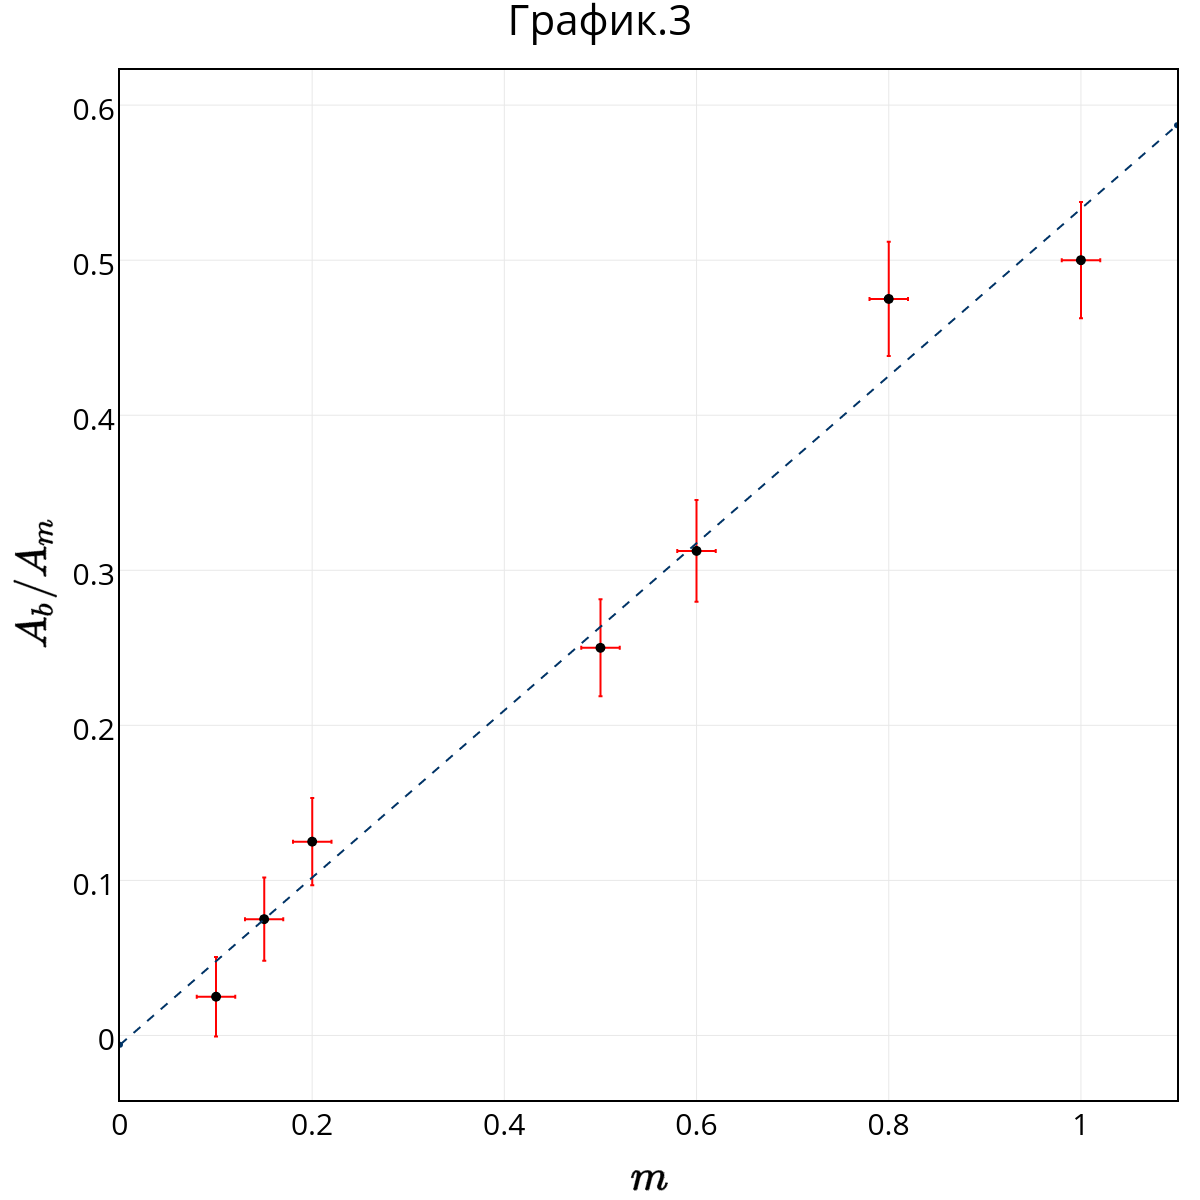

In [51]:
trace1 = go.Scatter(
    y = dataC['A'],
    x = dataC['m'],
    mode = 'markers',
    name = '$I~=~0,3~mA$',
    marker = dict(
        size = 10,
        opacity = 1,
        color = '#000000'
    ),
    error_y = dict(
        type = 'data',
        array = dataC['err_A'],
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    ),
    error_x = dict(
        type = 'data',
        array = dataC['err_m'],
        visible = True,
        color = '#ff0000',
        thickness = 2,
        width = 2
    )
)

trace1a = go.Scatter(
    x = [0.0, 1.1],
    y = [-0.006, -0.006 + 0.53910129 *1.1],
    line = dict(
        color = ('#003366'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace0 = [trace1, trace1a]

layout = go.Layout(
    showlegend=False,
    title = "График.3",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$m$',
        range = [0.0, 1.1],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$A_b / A_m$',
        #range = [0, 9],
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 120,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    ),
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(fig, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot3.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot3.png", width=500)